# Problem 1:

<font color="blue" >
First we import libraries we plan to use

In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font color="blue" >
Secondly, we import the data we aim to use

In [18]:

df=pd.read_excel(r"C:\Users\Bruker\OneDrive\Desktop\loans.xlsx")
df

,No,Credit History,Debt,Collatoral,Income,Risk
0,1,bad,high,no,< NOK 15K,high
1,2,unknown,high,no,NOK 15K – NOK 35K,high
2,3,unknown,low,no,NOK 15K – NOK 35K,medium
3,4,unknown,low,no,< NOK 15K,high
4,5,unknown,low,No,> NOK 35K,low
5,6,unknown,low,yes,> NOK 35K,low
6,7,bad,low,no,< NOK 15K,high
7,8,bad,low,yes,> NOK 35K,medium
8,9,good,low,no,> NOK 35K,low
9,10,good,high,yes,> NOK 35K,low


<font color="blue" >
Thirdly we meed to deal with the missing data

In [20]:

df["Credit History"]=df["Credit History"].map({"bad":"bad","unknown":"good","good":"good"})
#Here we use map() function in order to assign "good" as the most common value of the column in exchange for unknown values
df["Credit History"]

0      bad
1     good
2     good
3     good
4     good
5     good
6      bad
7      bad
8     good
9     good
10    good
11    good
12    good
13     bad
Name: Credit History, dtype: object

In [25]:
df["Income"]=df["Income"].map({"< NOK 15K":1,"NOK 15K – NOK 35K":2,"> NOK 35K":3})
df["Income"]
#Here we use map() function in order to assign reasonable values the machine can understand rather than stringd

0     1
1     2
2     2
3     1
4     3
5     3
6     1
7     3
8     3
9     3
10    1
11    2
12    3
13    2
Name: Income, dtype: int64

In [33]:
#we can also use other methods to transform into numbers
df_latest=pd.get_dummies(data=df,columns=["Credit History"],drop_first=True)
df_latest
# Here we use pd.get_dummies() function or order to transform "Credit History" into dummy numbers

,No,Debt,Collatoral,Income,Risk,Credit History_good
0,1,high,no,1,high,0
1,2,high,no,2,high,1
2,3,low,no,2,medium,1
3,4,low,no,1,high,1
4,5,low,No,3,low,1
5,6,low,yes,3,low,1
6,7,low,no,1,high,0
7,8,low,yes,3,medium,0
8,9,low,no,3,low,1
9,10,high,yes,3,low,1


In [36]:
# Here we use pd.get_dummies() function or order to transform ""Debt","Collatoral"" columns into dummy numbers
df_latest=pd.get_dummies(data=df_latest,columns=["Debt","Collatoral"],drop_first=True)
df_latest

,No,Income,Risk,Credit History_good,Debt_low,Collatoral_no,Collatoral_yes
0,1,1,high,0,0,1,0
1,2,2,high,1,0,1,0
2,3,2,medium,1,1,1,0
3,4,1,high,1,1,1,0
4,5,3,low,1,1,0,0
5,6,3,low,1,1,0,1
6,7,1,high,0,1,1,0
7,8,3,medium,0,1,0,1
8,9,3,low,1,1,1,0
9,10,3,low,1,0,0,1


<font color="blue" >
The fourth step is to drop unnecessary columns as No column we gives only index of the row and it meaningless for the algorithm

In [39]:

df_latest.drop("No",axis=1,inplace=True)

In [40]:
df_latest

,Income,Risk,Credit History_good,Debt_low,Collatoral_no,Collatoral_yes
0,1,high,0,0,1,0
1,2,high,1,0,1,0
2,2,medium,1,1,1,0
3,1,high,1,1,1,0
4,3,low,1,1,0,0
5,3,low,1,1,0,1
6,1,high,0,1,1,0
7,3,medium,0,1,0,1
8,3,low,1,1,1,0
9,3,low,1,0,0,1


<font color="blue" >
The next step is to implement the algorithm you want to use and split data into two as features and the target

In [41]:

from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree=DecisionTreeClassifier()
#Here we create an instance of the algorithm in order to use the algorithm 

In [44]:
#Here we separate the features of the data from the entire data and assign to X variable
X=df_latest.drop("Risk",axis=1)
X

,Income,Credit History_good,Debt_low,Collatoral_no,Collatoral_yes
0,1,0,0,1,0
1,2,1,0,1,0
2,2,1,1,1,0
3,1,1,1,1,0
4,3,1,1,0,0
5,3,1,1,0,1
6,1,0,1,1,0
7,3,0,1,0,1
8,3,1,1,1,0
9,3,1,0,0,1


In [45]:
#Here we separate the target column of the data from the entire data and assign to y variable
y=df["Risk"]
y

0       high
1       high
2     medium
3       high
4        low
5        low
6       high
7     medium
8        low
9        low
10      high
11    medium
12       low
13      high
Name: Risk, dtype: object

In [46]:
dtree.fit(X,y)
#Here we make algorithm to fit the data 

DecisionTreeClassifier()

<font color="blue" >
The next step is to amalyze how the algorith split data and why it chooses certain splitting points

In [47]:
from sklearn import tree

In [48]:
print(tree.export_text(dtree))
#Here we get an report of how the algorith split nodes from the root node to the last node

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- class: high
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: high
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: high
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: medium
|--- feature_0 >  2.50
|   |--- feature_1 <= 0.50
|   |   |--- class: medium
|   |--- feature_1 >  0.50
|   |   |--- class: low



In [50]:
X #This is the latest version of the features after data engineering

,Income,Credit History_good,Debt_low,Collatoral_no,Collatoral_yes
0,1,0,0,1,0
1,2,1,0,1,0
2,2,1,1,1,0
3,1,1,1,1,0
4,3,1,1,0,0
5,3,1,1,0,1
6,1,0,1,1,0
7,3,0,1,0,1
8,3,1,1,1,0
9,3,1,0,0,1


In [52]:
df #here is the original version of the data

,No,Credit History,Debt,Collatoral,Income,Risk
0,1,bad,high,no,1,high
1,2,good,high,no,2,high
2,3,good,low,no,2,medium
3,4,good,low,no,1,high
4,5,good,low,No,3,low
5,6,good,low,yes,3,low
6,7,bad,low,no,1,high
7,8,bad,low,yes,3,medium
8,9,good,low,no,3,low
9,10,good,high,yes,3,low


<font color="blue" >
The next step is to create functions to measure entropy and information gain of the several splitting points of the data in order to show the calculations the algorithm is performing and to understand why the algorith choose which column or feature as splitting nodes from the beginning to the end.

<font color="blue" >
Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

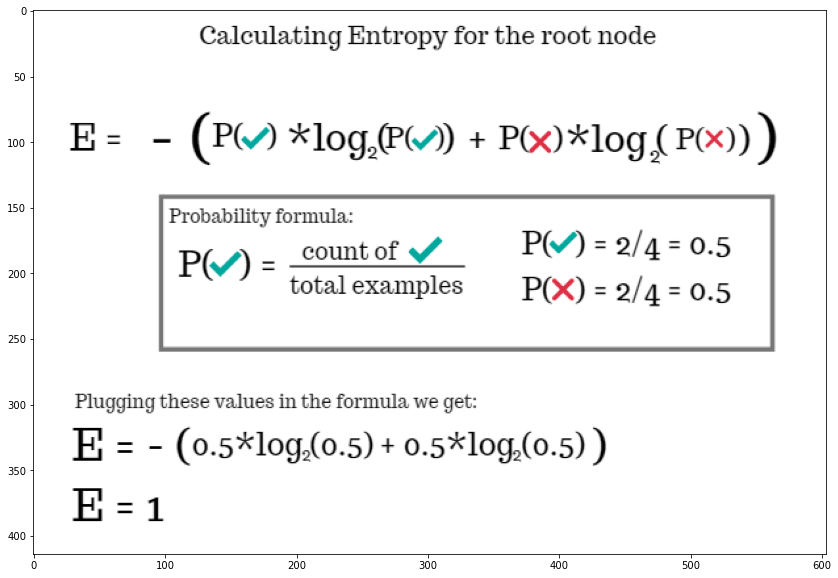

In [56]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread(r"C:\Users\Bruker\OneDrive\Desktop\entropy.png"))
# Here we get a picture of the formula of the information gain
# We will use these mathematical formulas to calculate them by code

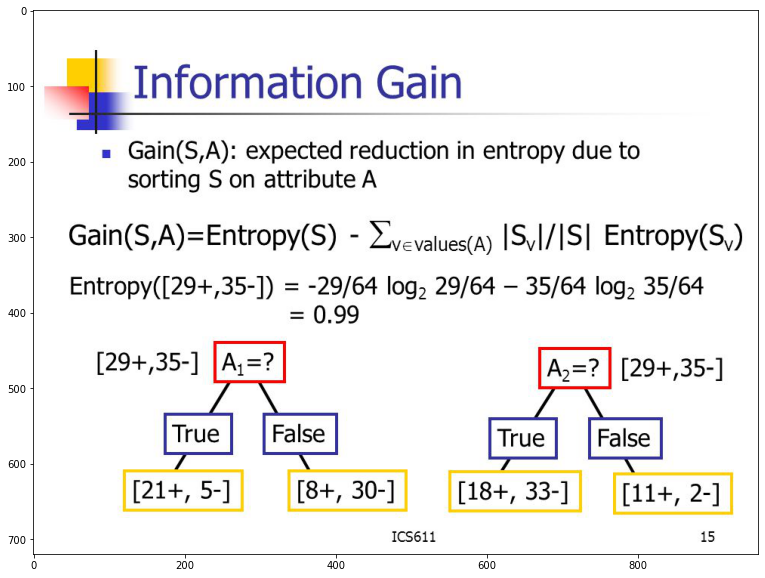

In [54]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread(r"C:\Users\Bruker\OneDrive\Desktop\information_gain.jpg"))
# Here we get a picture of the formula of the information gain

<font color="blue" >
Information gain is the main key that is used by Decision Tree Algorithms to construct a Decision Tree.
    
Decision Trees algorithm will always tries to maximize Information gain.
    
An attribute with highest Information gain will tested/split first.

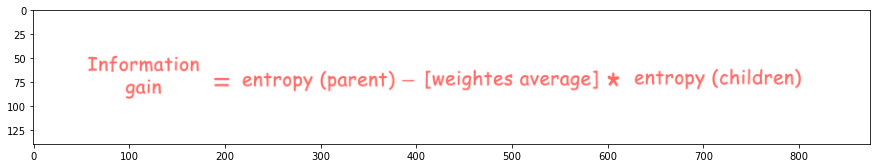

In [157]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread(r"C:\Users\Bruker\OneDrive\Desktop\entropy2.png"))
#Here is the formula of how we can calculate entropy
#below we will calculate the entropy and information gain based on these formulas

In [61]:
counts=np.bincount(df_latest["Income"])
counts
#This code will return the number of each unique value in a column


array([0, 4, 4, 6], dtype=int64)

In [62]:
len(df_latest["Income"]) 
#Here we get the length of the column

14

In [68]:
counts/(len(df_latest["Income"]))
#here we calculate the probability of each value vy dividing the length of the entire column


array([0.        , 0.28571429, 0.28571429, 0.42857143])

In [70]:
import math

In [71]:
#Now we will combine the codes above and create a function that calculates entrpy of each column
def calc_entropy(column):
    counts=np.bincount(column) #This code will return the number of each unique value in a column
    probability=counts/(len(column))#here we calculate the probability of each value vy dividing the length of the entire column
    entropy=0#we start 0 as the intial value of entropy
    for prob in probability: # here we a for loop to go throuh each probability of each unique value in the column
        if prob >0:
            entropy += prob * math.log(prob, 2) # here calculate entropy of each value and add them to find the total emtropy
    return -entropy # we should return - * entropy due to the formula
    

In [75]:
# Now we calculate the entropy of each column by using the function we have created
print(calc_entropy(df_latest["Income"]))
print(calc_entropy(df_latest["Credit History_good"]))
print(calc_entropy(df_latest["Debt_low"]))
print(calc_entropy(df_latest["Collatoral_no"]))
print(calc_entropy(df_latest["Collatoral_yes"]))

1.5566567074628228
0.863120568566631
1.0
0.863120568566631
0.74959525725948


In [77]:
#Now we will calculate information gain after calculating total entropy of each column
#Therefore we have to transform our target column into numerical values in order to make mathematical calculation
df_latest["Risk"]=df_latest["Risk"].map({"low":1,"medium":2,"high":3})
df_latest["Risk"]

0     3
1     3
2     2
3     3
4     1
5     1
6     3
7     2
8     1
9     1
10    3
11    2
12    1
13    3
Name: Risk, dtype: int64

In [82]:
#Here is our function to calculate information gain in order to show us which column provides the highest information gain 
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    return  original_entropy - subract
    

In [88]:
#Here we print information gain of  each column if it is selected as the splitting node
print(information_gain(df_latest,"Income","Risk"))
print(information_gain(df_latest,"Credit History_good","Risk"))
print(information_gain(df_latest,"Debt_low","Risk"))
print(information_gain(df_latest,"Collatoral_no","Risk"))
print(information_gain(df_latest,"Collatoral_yes","Risk"))


1.2449047091342313
0.23777146126924031
0.06289889437401786
0.319574820392573
0.20604950908542197


<font color="blue" >

As we can see the code above the "Income" column gives the highest information gain which complies with the exact result of the choices of algorithm as the code below:

In [158]:
print(tree.export_text(dtree))

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- class: high
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: high
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: high
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: medium
|--- feature_0 >  2.50
|   |--- feature_1 <= 0.50
|   |   |--- class: medium
|   |--- feature_1 >  0.50
|   |   |--- class: low



<font color="blue" >
Here we can visualize the splitting nodes of the algorithm based on the infromation as we calculates with our own code

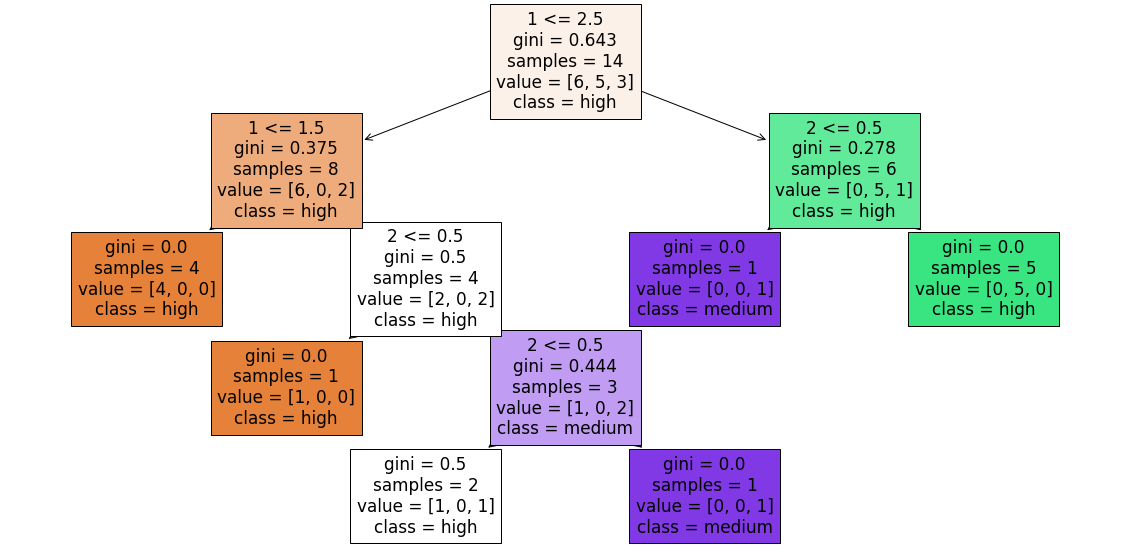

In [91]:
fig=plt.figure(figsize=(20,10))
_=tree.plot_tree(dtree,feature_names=df_latest["Income"],class_names=y,filled=True)

# Problem 2: 

In [94]:
df2=pd.read_csv(r"C:\Users\Bruker\OneDrive\Desktop\Teaching Assisstant\Assignment 1\Mushroom.csv")
df2
#First I import my data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [96]:
sample=df2.sample(25) # here we select 25 units as our sample via df.sample() method
sample

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
2568,e,f,y,e,t,n,f,c,b,w,...,s,w,w,p,w,o,p,k,v,d
4846,p,x,y,y,f,f,f,c,b,h,...,k,n,b,p,w,o,l,h,y,p
7806,e,k,s,n,f,n,a,c,b,n,...,s,o,o,p,n,o,p,b,c,l
6292,p,f,s,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
200,e,b,s,w,t,l,f,c,b,w,...,s,w,w,p,w,o,p,k,s,g
1923,e,x,y,e,t,n,f,c,b,w,...,s,g,w,p,w,o,p,n,v,d
556,e,x,f,w,t,l,f,w,n,w,...,s,w,w,p,w,o,p,u,v,d
2261,e,f,f,n,t,n,f,c,b,n,...,s,w,g,p,w,o,p,k,y,d
6044,p,x,y,e,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
3352,e,f,f,e,t,n,f,c,b,u,...,s,w,g,p,w,o,p,k,v,d


In [97]:
df2.info()
# Here we overall information about the data in the sample

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

In [98]:
df2.describe() # here we get overall statistical information about the data in the sample

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [99]:
df2.columns # here we list the names of the all columns in the sample

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [101]:
sample.isnull().sum() # here we check whether our sample has missing data or not
#Our sample has not any missing data as we can see below:

p      0
x      0
s      0
n      0
t      0
p.1    0
f      0
c      0
n.1    0
k      0
e      0
e.1    0
s.1    0
s.2    0
w      0
w.1    0
p.2    0
w.2    0
o      0
p.3    0
k.1    0
s.3    0
u      0
dtype: int64

In [124]:
y=sample["p"] # Here we assign the "p" column as our target data because this columns shows whether a mushroom is edible or not
y

2568    e
4846    p
7806    e
6292    p
200     e
1923    e
556     e
2261    e
6044    p
3352    e
6303    p
4549    p
1051    e
3214    e
4030    p
4808    p
2725    e
1470    e
5981    p
7897    e
5506    p
7001    p
2647    e
215     e
2495    e
Name: p, dtype: object

In [123]:
X=sample.drop("p",axis=1) # here we assign all the columns as our features apart from the target column and assign to variable X
X

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
2568,f,y,e,t,n,f,c,b,w,t,...,s,w,w,p,w,o,p,k,v,d
4846,x,y,y,f,f,f,c,b,h,e,...,k,n,b,p,w,o,l,h,y,p
7806,k,s,n,f,n,a,c,b,n,e,...,s,o,o,p,n,o,p,b,c,l
6292,f,s,e,f,s,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,l
200,b,s,w,t,l,f,c,b,w,e,...,s,w,w,p,w,o,p,k,s,g
1923,x,y,e,t,n,f,c,b,w,t,...,s,g,w,p,w,o,p,n,v,d
556,x,f,w,t,l,f,w,n,w,t,...,s,w,w,p,w,o,p,u,v,d
2261,f,f,n,t,n,f,c,b,n,t,...,s,w,g,p,w,o,p,k,y,d
6044,x,y,e,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l
3352,f,f,e,t,n,f,c,b,u,t,...,s,w,g,p,w,o,p,k,v,d


In [125]:
from sklearn.preprocessing import LabelEncoder
#In order to transform all these letters into meaningful numerical values I import LabelEncoder() function

In [126]:
Encoder_X=LabelEncoder()
for col in X.columns:
    X[col]=Encoder_X.fit_transform(X[col])
#Here we transform all the feature columns into numerical by using a for loop and LabelEncoder() function

In [127]:
X

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
2568,1,2,0,1,4,1,0,0,7,1,...,2,5,5,0,1,0,2,2,3,0
4846,3,2,5,0,2,1,0,0,2,0,...,1,2,0,0,1,0,1,1,4,3
7806,2,1,2,0,4,0,0,0,3,0,...,2,3,3,0,0,0,2,0,1,2
6292,1,1,0,0,5,1,0,1,0,1,...,2,4,5,0,1,0,0,6,3,2
200,0,1,4,1,3,1,0,0,7,0,...,2,5,5,0,1,0,2,2,2,1
1923,3,2,0,1,4,1,0,0,7,1,...,2,1,5,0,1,0,2,3,3,0
556,3,0,4,1,3,1,1,1,7,1,...,2,5,5,0,1,0,2,5,3,0
2261,1,0,2,1,4,1,0,0,3,1,...,2,5,1,0,1,0,2,2,4,0
6044,3,2,0,0,6,1,0,1,0,1,...,1,5,5,0,1,0,0,6,3,2
3352,1,0,0,1,4,1,0,0,6,1,...,2,5,1,0,1,0,2,2,3,0


In [128]:
Encoder_y=LabelEncoder()
y=Encoder_y.fit_transform(y)
y
#Here we transform all the values in the target column into numerical value by using LabelEncoder() function

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0])

In [129]:
y.shape #This is the shape of the target

(25,)

In [130]:
X.shape #This is the shape of the features of the mushrooms

(25, 22)

In [131]:
from sklearn.model_selection import train_test_split
#I import train_test_split() to split my data into train and test subsets

In [132]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#here split both features and target column into test and train subsets and we assign test size %20 via test_size=0.2 parameter

In [133]:
 X_train #This is our train set of the features

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
3352,1,0,0,1,4,1,0,0,6,1,...,2,5,1,0,1,0,2,2,3,0
1470,1,1,1,0,4,1,1,0,4,1,...,0,5,5,0,1,0,0,2,0,1
5506,3,2,2,0,6,1,0,1,0,1,...,1,4,4,0,1,0,0,6,3,2
4549,3,2,5,0,2,1,0,0,4,0,...,1,4,2,0,1,0,1,1,4,3
4808,1,0,1,0,2,1,0,0,1,0,...,1,0,0,0,1,0,1,1,4,0
4846,3,2,5,0,2,1,0,0,2,0,...,1,2,0,0,1,0,1,1,4,3
6044,3,2,0,0,6,1,0,1,0,1,...,1,5,5,0,1,0,0,6,3,2
2725,3,2,0,1,4,1,0,0,4,1,...,2,4,1,0,1,0,2,3,4,0
6292,1,1,0,0,5,1,0,1,0,1,...,2,4,5,0,1,0,0,6,3,2
7001,2,1,0,0,5,1,0,1,0,1,...,2,5,5,0,1,0,0,6,3,3


In [134]:
 X_test #This is our test set of the features

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
556,3,0,4,1,3,1,1,1,7,1,...,2,5,5,0,1,0,2,5,3,0
5981,1,1,3,1,4,1,0,0,5,0,...,2,5,5,0,1,1,2,4,3,1
7897,1,2,1,1,4,1,0,0,7,0,...,2,5,5,0,1,1,2,6,3,3
1051,3,0,1,0,4,1,1,0,4,1,...,0,5,5,0,1,0,0,3,0,1
1923,3,2,0,1,4,1,0,0,7,1,...,2,1,5,0,1,0,2,3,3,0


In [135]:
y_train #This is our train set of the target 

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [136]:
y_test #This is our test set of the target 

array([0, 1, 0, 0, 0])

In [137]:
from sklearn.tree import DecisionTreeClassifier
#Now our data is ready to machine learning and I call the DecisionTreeClassifier algorithm 
#because we have a classification problem

In [138]:
dtree2=DecisionTreeClassifier()

In [139]:
dtree2.fit(X_train,y_train) # Now the algorithm fits the train set

DecisionTreeClassifier()

In [144]:
predictions=dtree2.predict(X_test) #Here we make the peridiction based on the X_test features 

In [141]:
y_test #This includes original target values

array([0, 1, 0, 0, 0])

In [146]:
predictions #This is the prodictions of the algorithm
#As we can easily see that the algorithm failed only one of the 5 predictions 
#and mislabeled the second one as edible though it was poisonous

array([0, 0, 0, 0, 0])

<font color="blue" >
Now we will measure the performance of the algorithm 

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
print(classification_report(y_test,predictions)) 
# These are the results according to classification report
#Precision is %80 when it comes to predicti edible mushrooms but %0 when it comes to predict poisonous mushrooms

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<font color="blue" >
These are the results according to classification report:
    
Precision is %80 when it comes to predicti edible mushrooms but %0 when it comes to predict poisonous mushrooms

The accuracy is also %80.

We can visualize how you should evaluate the accuracy versus precision scores
 

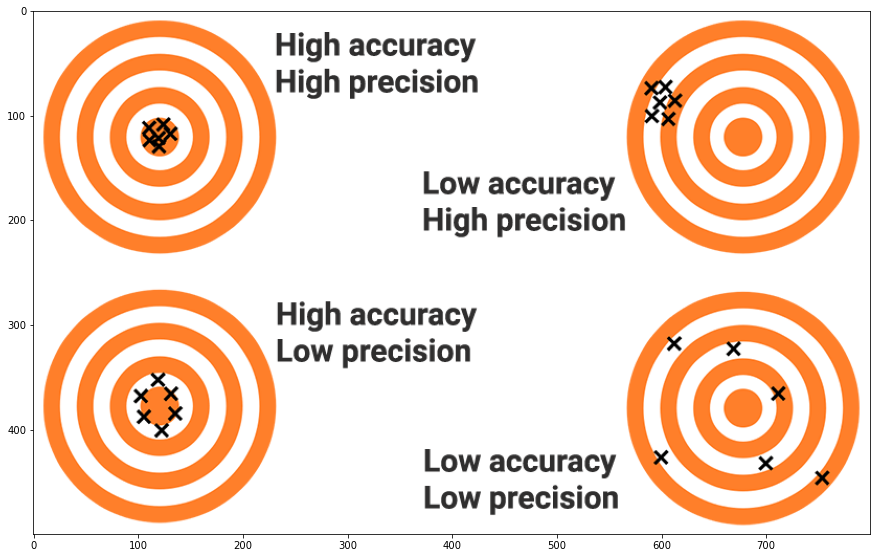

In [163]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread(r"C:\Users\Bruker\OneDrive\Desktop\accuracy.gif"))

In [160]:
print(confusion_matrix(y_test,predictions))
#These are the results of performance from confusion matrix

[[4 0]
 [1 0]]


<font color="blue" >
Based on confusion matrix, we have 4 true negative predictions(edible mushrooms are represnted as negative) and one false negative prediction(This means that our algothm labeled as negative(edible) but it is false, it should be positive(poisonous)

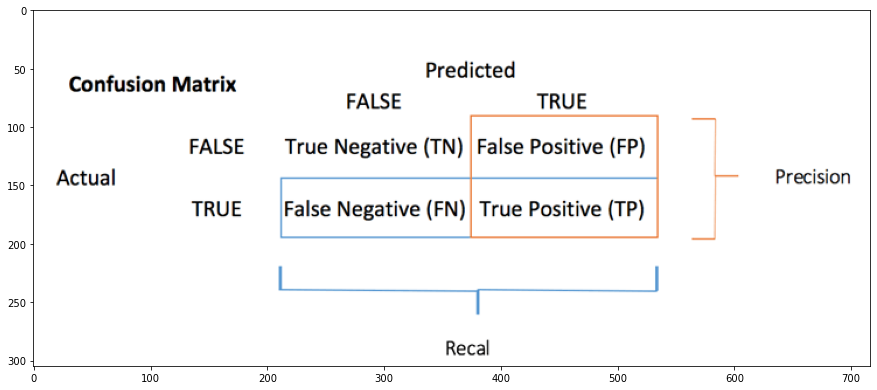

In [164]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread(r"C:\Users\Bruker\OneDrive\Desktop\confusion.png"))
#This figure below helps us to evaluate the results form the confusion matrix

In [165]:
from statsmodels.stats.proportion import proportion_confint

In [166]:
def confidence_interval(lower,upper):
    lower,upper=proportion_confint(4,5,0.1)
    return f"lower={lower}, upper={upper}"

<font color="blue" >
The using a function above we report the average performance with the 90% confidence interval in the code below.

This means that we can trust the predictions of the algorithm  at least %50 and %100 as the highest trust with the 90% confidence interval 


In [153]:
print(confidence_interval(4,5)) 

lower=0.5057596381679542, upper=1.0


In [167]:
predictions #These are the predictions

array([0, 0, 0, 0, 0])

In [168]:
y_test #These are the real values or labels

array([0, 1, 0, 0, 0])

In [ ]:
#Good luck